In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://raw.githubusercontent.com/taufiqurahman21/TUJUAN-CH2-PS309/0365f4eb38c75b1ee785c66a9114dea77c016eac/tujuan_data.csv"
df = pd.read_csv(url)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df['minat']

# Perform one-hot encoding for categorical labels
labels_encoded = pd.get_dummies(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(labels_encoded.shape[1], activation='softmax')
    # Adjust output layer based on the number of unique labels
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Save the model
model.save('tujuan.h5')


Epoch 1/10
125/125 [==============================] - 4s 15ms/step - loss: 1.0184 - accuracy: 0.6835 - val_loss: 0.3153 - val_accuracy: 0.9260
Epoch 2/10
125/125 [==============================] - 1s 7ms/step - loss: 0.1673 - accuracy: 0.9645 - val_loss: 0.0892 - val_accuracy: 0.9810
Epoch 3/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0671 - accuracy: 0.9880 - val_loss: 0.0709 - val_accuracy: 0.9840
Epoch 4/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0398 - accuracy: 0.9940 - val_loss: 0.0332 - val_accuracy: 0.9950
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0263 - accuracy: 0.9960 - val_loss: 0.0339 - val_accuracy: 0.9900
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0203 - accuracy: 0.9970 - val_loss: 0.0336 - val_accuracy: 0.9910
Epoch 7/10
125/125 [==============================] - 1s 4ms/step - loss: 0.0150 - accuracy: 0.9977 - val_loss: 0.0343 - val_accuracy: 0.9890
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Tampilkan informasi tentang lapisan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4544      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 6855 (26.78 KB)
Trainable params: 6855 (26.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


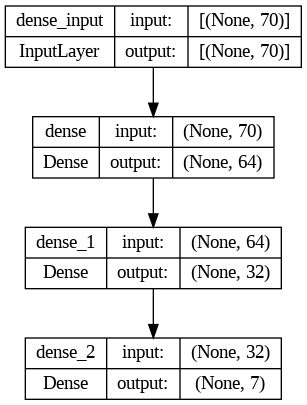

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot struktur model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/10
125/125 [==============================] - 2s 14ms/step - loss: 0.0076 - accuracy: 0.9995 - val_loss: 0.0166 - val_accuracy: 0.9940
Epoch 2/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0056 - accuracy: 0.9998 - val_loss: 0.0160 - val_accuracy: 0.9930
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9950
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.0112 - val_accuracy: 0.9970
Epoch 5/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9930
Epoch 6/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9970
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9960
Epo

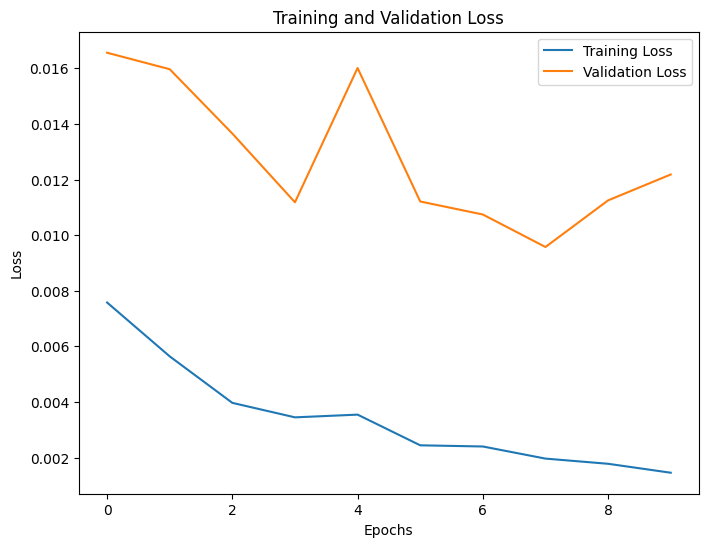

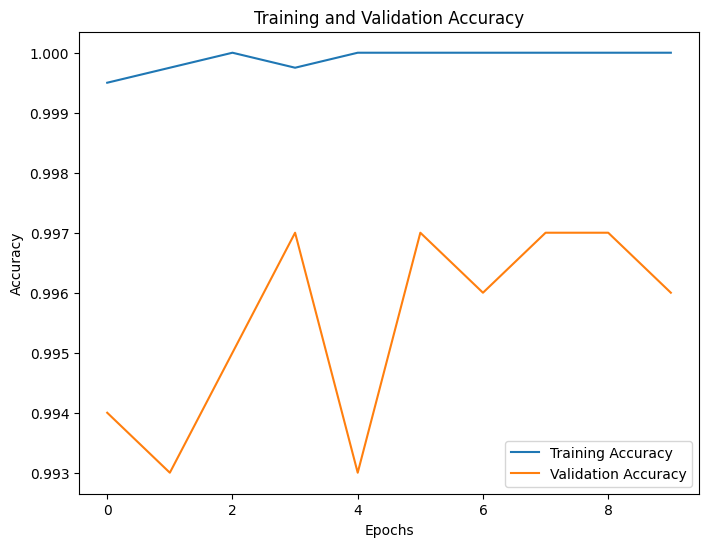

In [ ]:
import matplotlib.pyplot as plt

# Train the model and capture history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot loss during training
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy during training
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 42.3 MB/s eta 0:00:00


In [ ]:
import tensorflowjs as tfjs

# Konversi model ke format TensorFlow.js
tfjs.converters.save_keras_model(model, 'tujuan_model')

# Simpan model dalam format SavedModel
model.save('my_saved_model')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
